# Алгоритмы кластеризации

## Власова Т.

Основная задача этого задания - реализация одного из алгоритмов кластеризации.
Кроме того, необходимо будет проверить корректность работы алгоритма на тестовых данных, проверить работу алгоритма на данных различной природы, подбирать параметры алгоритма.

In [1]:
import random
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)


## Реализация алгоритма

Необходимо выбрать и реализовать самостоятельно один из следующих алгоритмов кластеризации:
* Агломеративная иерархическая кластеризация с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)
* DBSCAN. (параметры - epsilon, min_pts) - нужно самостоятельно разобрать и применить критерий качества для DBSCAN
* OPTICS(\*). (параметры - epsilon, min_pts) 
* Gaussian Mixture Model(\*\*) с использованием maximum a-posteriori для выбора кластера (параметр - k)

(\*) - Разберем на занятии 23 марта

(\*\*) - EM кластеризация. Алгоритм сложнее остальных, выбирайте его если уверены в своих навыках программирования.

## Интерфейс
Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [ ]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

In [2]:
import hdbscan

In [6]:
hd = hdbscan.HDBSCAN(min_cluster_size=10)
labels = hd.fit_predict(x_iris)

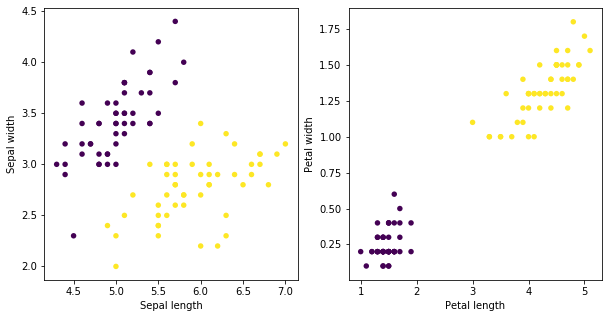

In [7]:
pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=labels, cmap="viridis", lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=labels, cmap="viridis", lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

In [8]:
def neib(p, data, n):
    return sum(sorted([np.linalg.norm(p - q) for q in data])[: n]) / n

In [27]:
neib(x_iris[0], x_iris, 4)

0.09571067811865473

In [14]:
data = x_iris
med_ind = [1, 20, 45, 70, 80]
dist_matr = np.zeros((len(data), len(med_ind)))
min_dists = np.zeros(len(data))
dist_vector = np.zeros(len(data))
target = np.Inf
for idx, p in enumerate(data):
    norms = [np.linalg.norm(p - data[q]) for q in med_ind]
    dist_vector[idx] = med_ind[np.asarray(norms).argmin()]
    min_dists[idx] = min(norms)
    dist_matr[idx] = norms
target = sum(min_dists)
dist_vector

array([20.,  1., 45., 45., 20., 20., 45.,  1., 45.,  1., 20., 45.,  1.,
       45., 20., 20., 20., 20., 20., 20., 20., 20., 45., 20., 20.,  1.,
       20., 20., 20., 45., 45., 20., 20., 20.,  1.,  1., 20.,  1., 45.,
       20.,  1., 45., 45., 20., 20., 45., 20., 45., 20.,  1., 70., 70.,
       70., 80., 70., 70., 70., 80., 70., 80., 80., 70., 80., 70., 80.,
       70., 70., 80., 80., 80., 70., 80., 70., 70., 70., 70., 70., 70.,
       70., 80., 80., 80., 80., 70., 70., 70., 70., 80., 80., 80., 80.,
       70., 80., 80., 80., 80., 80., 70., 80., 80.])

In [54]:
a= np.asarray([1, 3, 2, 5, 0])
for i in a:
    i = 3
a

array([1, 3, 2, 5, 0])

In [54]:
def medoid_remake(med_ind, dist_vector, data):
    new_meds = []
    for m in med_ind:
        clust = np.where(dist_vector == m) # индекс тех эл-в в данных, медоид которых равен m
        clust = clust[0]
        distances = [] # здесь будут суммы р-й каждой точки до всех остальных в этом кластере
        for i in clust:
            print(clust)
            #type((sum([np.linalg.norm(data[i] - data[q]) for q in clust if q != i])))
            distances.append(sum([np.linalg.norm(data[i] - data[q]) for q in clust if q != i]))
        new_meds.append(clust[np.asarray(distances).argmin()])
    #med_ind = new_meds
    return new_meds

In [59]:
clust = np.where(dist_vector == 1)
print(type(clust))
for q in clust[0]:
    print(q)
#     if q != 1:
#         print(np.linalg.norm(data[1] - data[q]))
clust

<class 'tuple'>
1
7
9
12
25
34
35
37
40
49


(array([ 1,  7,  9, 12, 25, 34, 35, 37, 40, 49], dtype=int64),)

In [55]:
medoid_remake(med_ind, dist_vector, data)

[ 1  7  9 12 25 34 35 37 40 49]
[ 1  7  9 12 25 34 35 37 40 49]
[ 1  7  9 12 25 34 35 37 40 49]
[ 1  7  9 12 25 34 35 37 40 49]
[ 1  7  9 12 25 34 35 37 40 49]
[ 1  7  9 12 25 34 35 37 40 49]
[ 1  7  9 12 25 34 35 37 40 49]
[ 1  7  9 12 25 34 35 37 40 49]
[ 1  7  9 12 25 34 35 37 40 49]
[ 1  7  9 12 25 34 35 37 40 49]
[ 0  4  5 10 14 15 16 17 18 19 20 21 23 24 26 27 28 31 32 33 36 39 43 44
 46 48]
[ 0  4  5 10 14 15 16 17 18 19 20 21 23 24 26 27 28 31 32 33 36 39 43 44
 46 48]
[ 0  4  5 10 14 15 16 17 18 19 20 21 23 24 26 27 28 31 32 33 36 39 43 44
 46 48]
[ 0  4  5 10 14 15 16 17 18 19 20 21 23 24 26 27 28 31 32 33 36 39 43 44
 46 48]
[ 0  4  5 10 14 15 16 17 18 19 20 21 23 24 26 27 28 31 32 33 36 39 43 44
 46 48]
[ 0  4  5 10 14 15 16 17 18 19 20 21 23 24 26 27 28 31 32 33 36 39 43 44
 46 48]
[ 0  4  5 10 14 15 16 17 18 19 20 21 23 24 26 27 28 31 32 33 36 39 43 44
 46 48]
[ 0  4  5 10 14 15 16 17 18 19 20 21 23 24 26 27 28 31 32 33 36 39 43 44
 46 48]
[ 0  4  5 10 14 15 16 17 18 19 2

[34, 48, 47, 91, 69]

### Реализация DBSCAN

In [12]:
from sklearn.base import BaseEstimator, ClusterMixin
from itertools import cycle
from math import hypot


# возврат массива индексов ближайших соседей для точки из множества с заданным расстоянием
def region_query(p, eps, data):
    return [idx for idx, q in enumerate(data) if np.linalg.norm(p - q) < eps]

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm
    """

        
    def __init__(self, eps=0.5, min_samples=3):
        """
        Please add necessary algoritm parameters to class constructor.
        """

        self.eps = eps
        self.min_samples = min_samples
        
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        labels = np.zeros(len(x))

        NOISE = 0
        C = 0

        for idx, p in enumerate(x):
            if labels[idx] != 0:
                continue
            neighbours = region_query(p, self.eps, x)
            if len(neighbours) >= self.min_samples:
                C += 1
                labels[idx] = C
                for i in neighbours:
                    if labels[i] != 0:
                        continue
                    labels[i] = C
                    border = region_query(x[i], self.eps, x)
                    if len(border) >= self.min_samples:
                        neighbours += border
        self.labels = labels
        return self


    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.labels

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

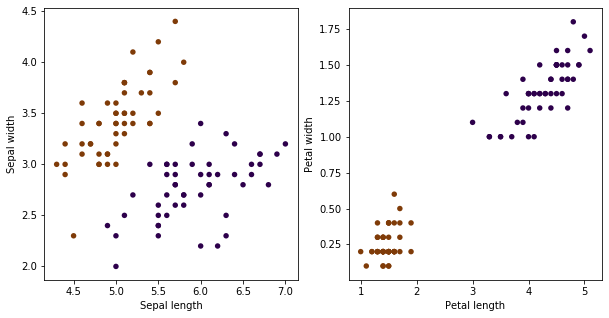

In [5]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

In [16]:
# при min_samples=3 ARI=1 при eps=[0.65, 1.64]

pred_iris = Clustering(eps=0.7, min_samples=8).fit_predict(x_iris)
print("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris))
print(*pred_iris)

Adjusted Rand index for iris is: 0.96
1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 0.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 0.0 2.0


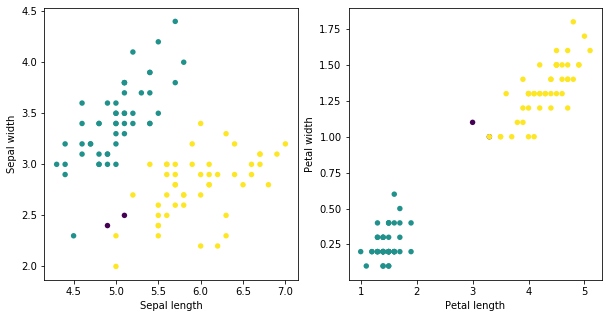

In [17]:
# Graph for self-written algorithm

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=pred_iris, cmap='viridis', lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=pred_iris, cmap='viridis', lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. 
Сравним результат работы реализованного алгоритма кластеризации с эталонной кластеризацией, воспользоваавшись метрикой [adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html). 

Скорее всего значение этой метрики сильно отличается от 1, поэтому поработаем над улучшением реализации своего алгоритма.  Необходимо подобрать параметры модели с использованием эвристик или критериев качества. 

Критерий локтя:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

Для DBSCAN применяется эвристика по подсчету среднего расстояния до min-pts точек, их сортировки, далее применяется критерий локтя (описание https://habrahabr.ru/post/322034/ или http://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf)

Применим критерий для выбора параметров алгоритма. Измените следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров, а так же при необходимости изменить этот код (для DBSCAN). На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров. Возможно, необходимо построить такую визуализацию несколько раз.

##### Метод локтя для DBSCAN

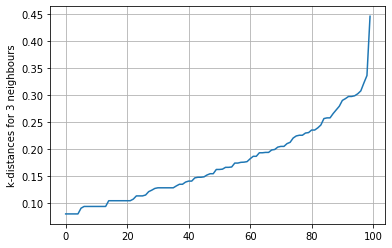

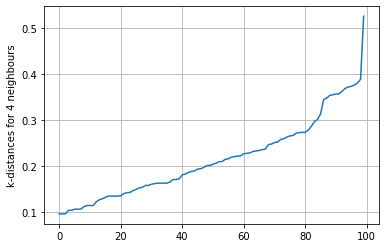

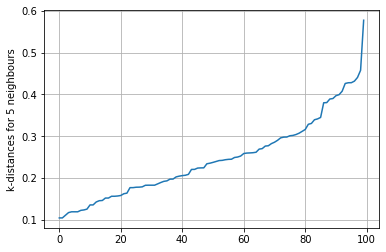

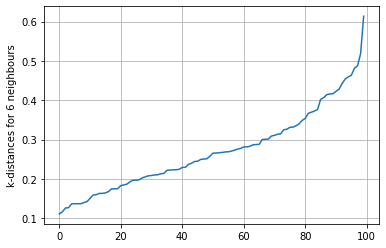

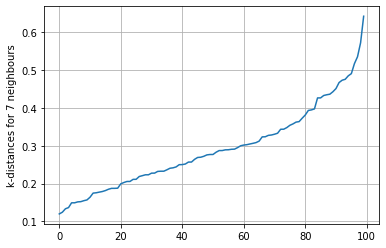

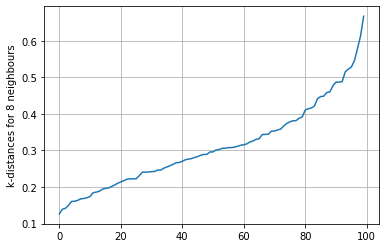

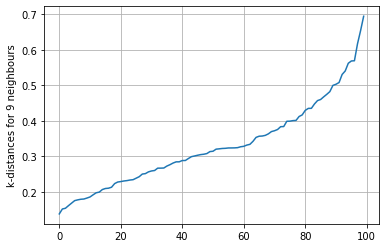

In [26]:
# для каждой точки высчитывается среднее расстояние до n ближайших соседей
def k_neib(p, data, n):
    return sum(sorted([np.linalg.norm(p - q) for q in data])[: n]) / n

# для каждой точки в датасете высчитывается среднее р-е до n ближайших соседей
def all_knn(min_pts):
    all_knn = []
    for i in x_iris:
        all_knn.append(k_neib(i, x_iris, min_pts))
    return sorted(all_knn)

# функция all_knn(min_pts) возвращает отсортированный массив средних расстояний каждой точки до её n ближайших соседей
for i in range(3, 10):
    nbrs = all_knn(i)
    
    plt.plot(nbrs)
    plt.ylabel(f"k-distances for {i} neighbours")
    plt.grid(True)
    plt.show()

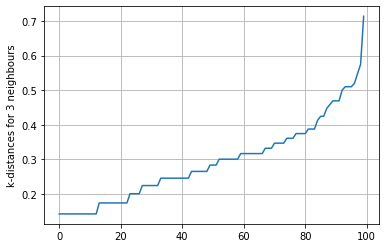

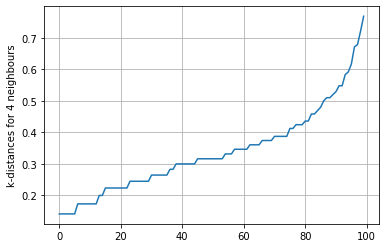

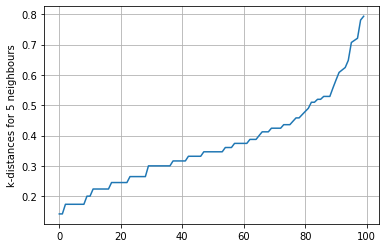

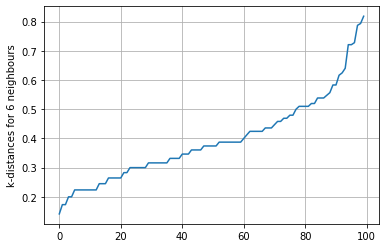

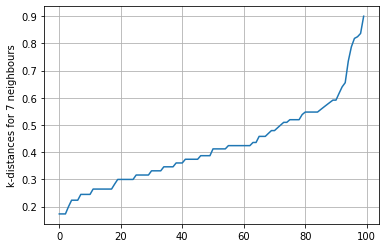

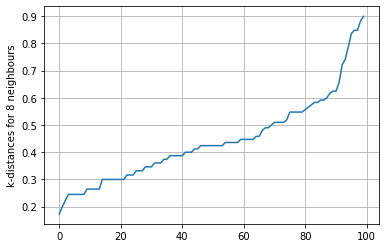

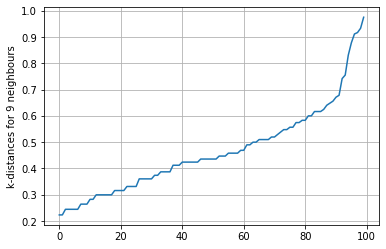

In [6]:
from sklearn.neighbors import NearestNeighbors

for i in range(3, 10):
    nbrs = NearestNeighbors(n_neighbors=i, algorithm='ball_tree').fit(x_iris)
    distances, indices = nbrs.kneighbors(x_iris)
    
    plt.plot(sorted(distances[:, -1]))
    plt.ylabel(f"k-distances for {i} neighbours")
    plt.grid(True)
    plt.show()

Теперь кластеризуйте с помощью реализованного алгоритма данные из лекции.

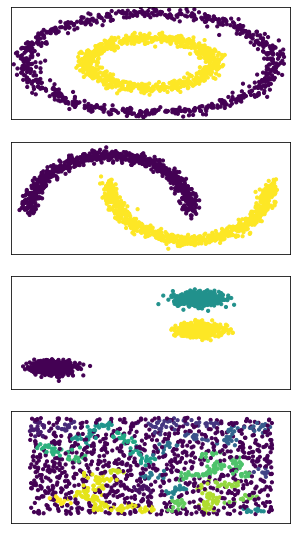

Self written DBSCAN work time: 0 sec 411448 microsec


In [8]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from datetime import datetime

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

plt.figure(figsize=(2 + 3, 9.5))

data = [noisy_circles, noisy_moons, blobs, no_structure]

start_time = datetime.now()

for i_dataset, dataset in enumerate(data):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    #clust = Clustering(0.26, 3).fit_predict(X)
    clust = hd.fit_predict(X)
    
    # plot
    plt.subplot(4, 1, i_dataset + 1)
    plt.scatter(X[:, 0], X[:, 1], c=clust, s=10)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())

plt.show()

delta = datetime.now() - start_time
print(f"Self written DBSCAN work time: {delta.seconds} sec {delta.microseconds} microsec")

Примените такой же алгоритм реализованный в библиотеке sklearn на тех же данных. 
Сравните результат и время, за которое отрабатывает ваш алгоритм и алгоритм из sklearn.

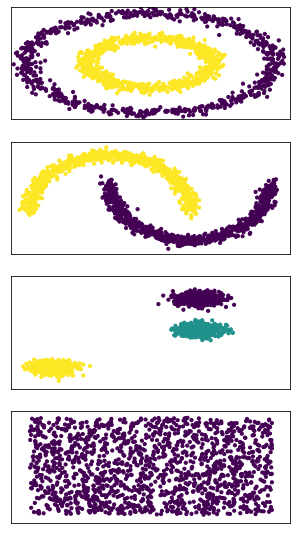

Sklearn DBSCAN work time: 0 sec 400995 microsec


In [8]:
from sklearn.cluster import DBSCAN

np.random.seed(0)

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

plt.figure(figsize=(2 + 3, 9.5))

data = [noisy_circles, noisy_moons, blobs, no_structure]

start_time = datetime.now()

for i_dataset, dataset in enumerate(data):
    X, y = dataset
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    db = DBSCAN(eps=0.26, min_samples=3).fit_predict(X)
    
    # plot
    plt.subplot(4, 1, i_dataset + 1)
    plt.scatter(X[:, 0], X[:, 1], c=db, s=10)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks(())
    plt.yticks(())

plt.show()

delta = datetime.now() - start_time
print(f"Sklearn DBSCAN work time: {delta.seconds} sec {delta.microseconds} microsec")